   ### Equation :  f''' + ff'' + 1 -  (f')<sup>2</sup> = 0
   #### Conditions - </br>
      f(0) = 0, f'(0) = 0, f'(10) = 1  
      

In [84]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
h = 1
N = int(10/h)
x = np.linspace(0, 10, N+1)

# Initial Assumption
F = x*(10-x) + x/10.0
f = 5*x**2 - x**3/3.0 + x**2/20.0

In [99]:
def block_diagonal(a, b, c, d):
    n = len(d)
    
    b_ = np.zeros(a.shape)
    c_ = np.zeros(a.shape)
    d_ = np.zeros((n,2,1))
    w = np.zeros((n,2,1))

    c_[0] = np.linalg.inv(b[0]).dot(c[0]) 
    d_[0] = np.linalg.inv(b[0]).dot(d[0]) 
    
    for i in range(1,n):
        b_[i] = b[i] - a[i].dot(c_[i-1])
        c_[i] = np.linalg.inv(b_[i]).dot(c[i])
        d_[i] = np.linalg.inv(b_[i]).dot((d[i] - a[i].dot(d_[i-1])))
    
    w[n-1] = np.copy(d_[n-1])
    for i in range(n-2, -1, -1):
        w[i] = d_[i] - c_[i].dot(w[i+1])

    return w

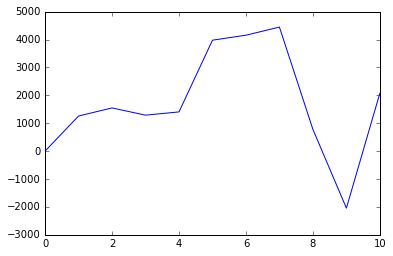

In [100]:
k = 10

for i in range(k):
    A = np.zeros((N-1,2,2))
    B = np.zeros((N-1,2,2))
    C = np.zeros((N-1,2,2))
    D = np.zeros((N-1,2,1))
    for i in range(1,N):
        A[i-1] = np.array([[-1, -h/2.0], [0, 1/h**2 - f[i]/(2.0*h)]], dtype=np.float64)
        B[i-1] = np.array([[1, -h/2.0], [(F[i+1] - F[i-1])/(2.0*h), -2.0/h**2 + 2*F[i]]], dtype=np.float64)
        C[i-1] = np.array([[0, 0], [0, 1/h**2 + f[i]/(2.0*h)]], dtype=np.float16)

        D[i-1] = np.array([[-f[i] + f[i-1] + 0.5*h*(F[i] + F[i-1])], 
                  [(F[i+1] - 2*F[i] + F[i-1]) / (-1*h**2) + f[i] *(-F[i+1] + F[i-1])/(2.0*h)+ F[i]**2]], dtype=np.float64)
    f[1:N] = f[1:N] + block_diagonal(A, B, C, D)[:,0][:,0]
    F[1:N] = F[1:N] + block_diagonal(A, B, C, D)[:,1][:,0]
    f[N] = f[N-1] + 0.5*h*(F[N] + F[N-1]) 
plt.plot(x,f)